In [145]:
import numpy as np
import pandas as pd
import ChartDrawer
from ChartDrawer import MultiLineChart

# Intra-similarity analysis

In [146]:
intra_similarities = pd.read_csv("data/similarity/univ2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/univ2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)


def create_bins(start=0, end=100, num=5):
    bins = []
    step = int((end - start) / num)
    for idx in range(start, end, step):
        bins.append((idx, idx + step))
    return bins


def count_bins(x, bins):
    counts = [0] * len(bins)
    for v in x:
        if v == 0:
            counts[0] += 1
        else:
            for i in range(len(bins)):
                b = bins[i]
                if b[0] < v <= b[1]:
                    counts[i] += 1
    return counts


def to_percentage(x):
    sum = np.sum(x)
    return x / sum * 100


def bins_to_labels(bins):
    return [b[1] for b in bins]


def lines_with_lower_bound_build(df, title, x_label, y_label, chain="ETH", legend_pos = 'upper left', thsld = [1, 10, 50, 100]):
    Ys = []
    labels = []
    bins = create_bins(num=20)
    x = bins_to_labels(bins)
    for gs in thsld:
        labels.append(f">={gs}")
        filtered_df = df[df.scammers >= gs]
        display(filtered_df.similarity.describe())
        y = list(filtered_df.similarity.values * 100)
        y = count_bins(y, bins)
        print(f"Group size {gs}", y)
        y = to_percentage(y)
        print(f"Group size {gs} (%)", y)
        Ys.append(y)
    return MultiLineChart(x, Ys, labels, title, x_label, y_label, "Group size", MultiLineChart.color_set[chain], legend_pos)


def hist_chart_with_lower_bound(df):
    Xs = []
    for gs in [1, 10, 50, 100]:
        filtered_df = df[df["scammers"] >= gs]
        display(filtered_df.similarity.describe())
        x = list(filtered_df.similarity.values)
        Xs.append(x)
    ChartDrawer.hist(Xs, 50, f"Similarity distribution by group sizes", "Intra-similarity", "Number of groups")

In [147]:
filter_df = total[total.scammers >= 100]
x = filter_df.similarity.values * 100
bins = create_bins()
result = count_bins(x, bins)
result

[0, 4, 6, 4, 7]

In [148]:
print(len(x))
print(np.sum(result))
len(x) == np.sum(result)

21
21


True

In [149]:
to_percentage(result)

array([ 0.        , 19.04761905, 28.57142857, 19.04761905, 33.33333333])

count    16374.000000
mean         0.748419
std          0.265113
min          0.000000
25%          0.567844
50%          0.826087
75%          1.000000
max          1.000000
Name: similarity, dtype: float64

Group size 1 [10, 197, 266, 234, 395, 405, 515, 446, 500, 474, 468, 448, 459, 520, 664, 1357, 1854, 888, 791, 5483]
Group size 1 (%) [ 0.06107243  1.20312691  1.62452669  1.42909491  2.41236106  2.47343349
  3.14523024  2.72383046  3.0536216   2.89483327  2.85818981  2.73604495
  2.80322462  3.17576646  4.05520948  8.28752901 11.32282888  5.42323195
  4.83082936 33.48601441]


count    521.000000
mean       0.733449
std        0.228411
min        0.204692
25%        0.539958
50%        0.739942
75%        0.978610
max        1.000000
Name: similarity, dtype: float64

Group size 10 [0, 0, 0, 0, 2, 3, 15, 26, 26, 34, 35, 36, 37, 27, 20, 27, 23, 18, 34, 158]
Group size 10 (%) [ 0.          0.          0.          0.          0.38387716  0.57581574
  2.87907869  4.99040307  4.99040307  6.52591171  6.71785029  6.90978887
  7.10172745  5.18234165  3.83877159  5.18234165  4.41458733  3.45489443
  6.52591171 30.32629559]


count    71.000000
mean      0.717238
std       0.232319
min       0.298265
25%       0.531538
50%       0.657231
75%       0.976035
max       1.000000
Name: similarity, dtype: float64

Group size 50 [0, 0, 0, 0, 0, 1, 1, 6, 3, 4, 4, 6, 9, 4, 3, 1, 1, 0, 6, 22]
Group size 50 (%) [ 0.          0.          0.          0.          0.          1.4084507
  1.4084507   8.45070423  4.22535211  5.63380282  5.63380282  8.45070423
 12.67605634  5.63380282  4.22535211  1.4084507   1.4084507   0.
  8.45070423 30.98591549]


count    21.000000
mean      0.662904
std       0.256699
min       0.298265
25%       0.427184
50%       0.600000
75%       0.976190
max       1.000000
Name: similarity, dtype: float64

Group size 100 [0, 0, 0, 0, 0, 1, 0, 3, 2, 1, 1, 2, 3, 0, 1, 0, 0, 0, 0, 7]
Group size 100 (%) [ 0.          0.          0.          0.          0.          4.76190476
  0.         14.28571429  9.52380952  4.76190476  4.76190476  9.52380952
 14.28571429  0.          4.76190476  0.          0.          0.
  0.         33.33333333]


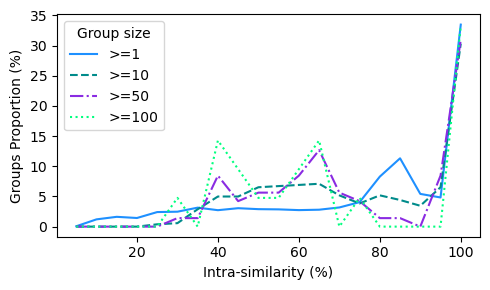

In [150]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "ETH")
ChartDrawer.multi_lines("img/intra_uni.png",setting_1)


In [151]:
intra_similarities = pd.read_csv("data/similarity/panv2_intra_similarities.csv")
one_scammer_intra_similarities = pd.read_csv("data/similarity/panv2_one_scammer_group_intra_similarities.csv")
total = pd.concat([intra_similarities, one_scammer_intra_similarities], axis=0)

count    1374.000000
mean        0.796244
std         0.258635
min         0.059701
25%         0.720930
50%         0.888544
75%         1.000000
max         1.000000
Name: similarity, dtype: float64

Group size 1 [0, 8, 24, 26, 32, 32, 33, 33, 19, 32, 19, 17, 23, 32, 45, 67, 137, 128, 105, 562]
Group size 1 (%) [ 0.          0.58224163  1.74672489  1.8922853   2.32896652  2.32896652
  2.40174672  2.40174672  1.38282387  2.32896652  1.38282387  1.23726346
  1.67394469  2.32896652  3.27510917  4.87627365  9.97088792  9.31586608
  7.6419214  40.90247453]


count    4.000000
mean     0.629480
std      0.389293
min      0.159765
25%      0.388557
50%      0.679077
75%      0.920000
max      1.000000
Name: similarity, dtype: float64

Group size 10 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]
Group size 10 (%) [ 0.  0.  0. 25.  0.  0.  0.  0.  0. 25.  0.  0.  0.  0.  0.  0.  0. 25.
  0. 25.]


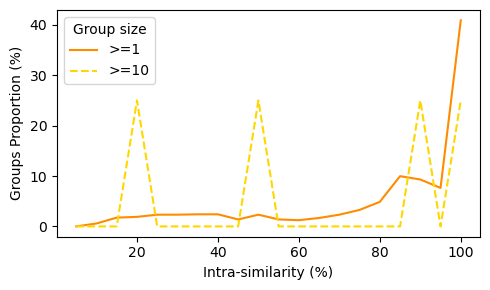

In [152]:
setting_1 = lines_with_lower_bound_build(total,"","Intra-similarity (%)", "Groups Proportion (%)", "BNB", thsld=[1,10])
ChartDrawer.multi_lines("img/intra_pan.png", setting_1)

# INTER SIMILARITY

count    74254.000000
mean         0.274613
std          0.068698
min          0.011937
25%          0.213926
50%          0.286301
75%          0.336296
max          0.390249
Name: similarity, dtype: float64

Group size 1 [45, 71, 1547, 13038, 14059, 12959, 19499, 13036, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [ 0.0606028   0.09561774  2.08338945 17.55865004 18.93366014 17.45225846
 26.25986479 17.55595658  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    530.000000
mean       0.219741
std        0.062774
min        0.107894
25%        0.174517
50%        0.198739
75%        0.268996
max        0.375602
Name: similarity, dtype: float64

Group size 10 [0, 0, 33, 238, 116, 60, 56, 27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.          0.          6.22641509 44.90566038 21.88679245 11.32075472
 10.56603774  5.09433962  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    72.000000
mean      0.202072
std       0.046111
min       0.134569
25%       0.172378
50%       0.195744
75%       0.215371
max       0.356767
Name: similarity, dtype: float64

Group size 50 [0, 0, 5, 35, 23, 5, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 50 (%) [ 0.          0.          6.94444444 48.61111111 31.94444444  6.94444444
  2.77777778  2.77777778  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    21.000000
mean      0.201787
std       0.036922
min       0.137617
25%       0.178958
50%       0.196380
75%       0.210295
max       0.302191
Name: similarity, dtype: float64

Group size 100 [0, 0, 1, 12, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 100 (%) [ 0.          0.          4.76190476 57.14285714 28.57142857  4.76190476
  4.76190476  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


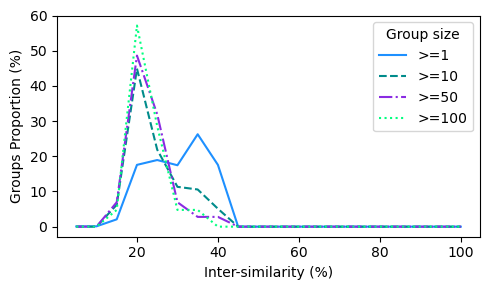

In [153]:
inter_similarities = pd.read_csv("data/similarity/univ2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"", "Inter-similarity (%)", "Groups Proportion (%)", "ETH", "upper right")
ChartDrawer.multi_lines("img/inter_uni.png",setting_1)

count    9610.000000
mean        0.212227
std         0.045962
min         0.014191
25%         0.176744
50%         0.223448
75%         0.247683
max         0.295722
Name: similarity, dtype: float64

Group size 1 [27, 47, 1027, 2413, 4024, 2072, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 1 (%) [ 0.28095734  0.48907388 10.6867846  25.10926119 41.87304891 21.56087409
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


count    36.000000
mean      0.205707
std       0.037524
min       0.109809
25%       0.183534
50%       0.212968
75%       0.234362
max       0.254450
Name: similarity, dtype: float64

Group size 10 [0, 0, 4, 10, 18, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Group size 10 (%) [ 0.          0.         11.11111111 27.77777778 50.         11.11111111
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.        ]


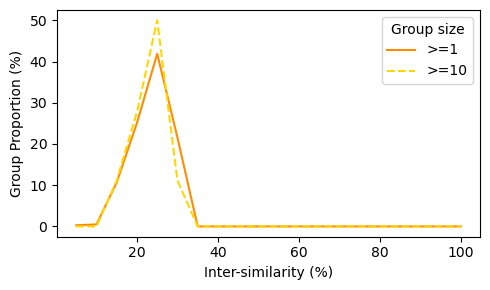

In [154]:
inter_similarities = pd.read_csv("data/similarity/panv2_inter_similarities.csv")
setting_1 = lines_with_lower_bound_build(inter_similarities,"","Inter-similarity (%)", "Group Proportion (%)", "BNB", "upper right", thsld=[1,10])
ChartDrawer.multi_lines("img/inter_pan.png",setting_1)

Group size 20 [4.66309163e-02 1.16577291e+00 1.77197482e+00 1.42224295e+00
 2.37817673e+00 2.07507578e+00 2.33154581e+00 1.51550478e+00
 1.49218932e+00 1.79529028e+00 1.23571928e+00 2.09839123e+00
 1.84192119e+00 2.19165307e+00 2.26159944e+00 5.52576358e+00
 6.41175099e+00 4.68640709e+00 5.22266263e+00 5.25297272e+01]


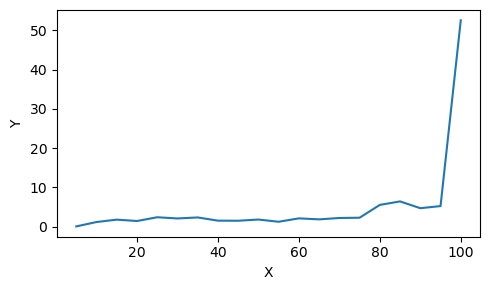

68.8505479132665
100% similarities 2038


In [155]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/univ2_individual_similarities.csv")
y = list(idv_similarities.similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_uni.png", setting)
print(sum(y[-4:]))
print("100% similarities", len(idv_similarities[idv_similarities["similarity"] == 1]))

Group size 20 [ 0.14577259  0.94752187  1.82215743  2.55102041  3.27988338  2.7696793
  2.18658892  2.55102041  2.40524781  3.06122449  2.33236152  1.60349854
  2.11370262  2.47813411  3.86297376  4.73760933  9.54810496 10.64139942
  7.28862974 33.67346939]


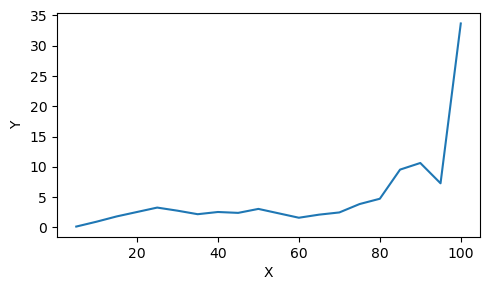

61.15160349854227


In [156]:
bins = create_bins(num=20)
x = bins_to_labels(bins)
idv_similarities = pd.read_csv("data/similarity/panv2_individual_similarities.csv")
y = list(idv_similarities.similarity.values * 100)
y = count_bins(y, bins)
y = to_percentage(y)
print(f"Group size {len(y)}", y)
setting = MultiLineChart(x, [y], [""], "", "X", "Y")
ChartDrawer.multi_lines("img/idv_pan.png", setting)
print(sum(y[-4:]))

In [157]:
print("100% similarities", len(idv_similarities[idv_similarities["similarity"] == 1]))

100% similarities 411
